# McDonald's Review Analysis: 

                                                                                                   Name: ManikantaReddy Annem
                                                                                                 

In [235]:
#Downloading the Packages
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\reddy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\reddy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\reddy\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [236]:
#Installing python Modules
!pip install textblob
!pip install WordCloud


In [237]:
#importing all the libraries and methods
import pandas as pd
from colorama import Fore, init
import re
import matplotlib.pyplot as plt
import seaborn as sns
from faker import Faker
import pandas as pd
import random
from datetime import datetime, timedelta

import missingno as msno
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
from collections import Counter
import plotly.express as px
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [238]:
df = pd.read_csv("McDonald_s_Reviews.csv", encoding = 'latin1')

In [239]:
df

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star
...,...,...,...,...,...,...,...,...,...,...
33391,33392,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",4 years ago,They treated me very badly.,1 star
33392,33393,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",a year ago,The service is very good,5 stars
33393,33394,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",a year ago,To remove hunger is enough,4 stars
33394,33395,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",5 years ago,"It's good, but lately it has become very expen...",5 stars


## 1. Data Preparation:

In the line df = df.dropna(), missing values in the dataset are addressed by removing entire rows where at least one value is missing. This is a common strategy when missing values are limited, and you prefer not to impute or estimate them.

In [240]:
#### 1. Handle missing values :

In [241]:

# Checking for missing values
missing_values = df.isnull().sum()
#dropna() method is used to remove rows containing missing values (NaN) from a DataFrame.
df = df.dropna()

#### 2. Standardizing Text Data:

In [242]:
# Assuming 'review' is the column with textual content
# Convert text to lowercase for consistency
df['review'] = df['review'].str.lower()

# Remove leading and trailing whitespaces
df['review'] = df['review'].str.strip()

# Remove numbers from text
df['review'] = df['review'].apply(lambda x: ''.join([i for i in x if not i.isdigit()]))


C:\Users\reddy\AppData\Local\Temp\ipykernel_34988\2435636197.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\reddy\AppData\Local\Temp\ipykernel_34988\2435636197.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\reddy\AppData\Local\Temp\ipykernel_34988\2435636197.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [243]:

# As the 'review' column is the with textual content
# Remove stopwords from text
stop_words = set(stopwords.words('english'))
df['review'] = df['review'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]))
print(df['review'])

0        look like someone spit food ? normal transacti...
1        'd mcdonalds . far food atmosphere go . staff ...
2        made mobile order got speaker checked . line m...
3        mc . crispy chicken sandwich ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...
4        repeat order times drive thru , still manage m...
                               ...                        
33391                                      treated badly .
33392                                         service good
33393                                 remove hunger enough
33394                  's good , lately become expensive .
33395                                       took good care
Name: review, Length: 32736, dtype: object


C:\Users\reddy\AppData\Local\Temp\ipykernel_34988\1268409546.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### 3. Feature Engineering:

In [244]:
df1 = df.copy()


In [245]:
# Drop columns 'store_name', 'category', 'latitude', 'longitude', and 'rating_count'
df1 = df1.drop(columns=['reviewer_id','store_name', 'category', 'latitude ', 'longitude', 'rating_count'])

In [246]:
df1.head(2)

,store_address,review_time,review,rating
0,"13749 US-183 Hwy, Austin, TX 78750, United States",3 months ago,look like someone spit food ? normal transacti...,1 star
1,"13749 US-183 Hwy, Austin, TX 78750, United States",5 days ago,'d mcdonalds . far food atmosphere go . staff ...,4 stars


###### Store Address

In [247]:
df1[['store_address']].sample(4)

,store_address
18986,"1100 N US Hwy 377, Roanoke, TX 76262, United S..."
5638,"5920 Balboa Ave, San Diego, CA 92111, United S..."
23552,"5725 W Irlo Bronson Memorial Hwy, Kissimmee, F..."
30502,"9814 International Dr, Orlando, FL 32819, Unit..."


In [248]:
df1[['City', 'State']] = df1['store_address'].apply(lambda x: pd.Series(x.split(', ')[-3:-1]))

In [249]:
df1[['City','State']].sample(4)

,City,State
17760,Voorhees Township,NJ 08043
30253,Orlando,FL 32819
30730,Orlando,FL 32819
5079,New York,NY 10003


In [250]:
df1 = df1.drop(columns=['store_address'])

###### Review Time

In [251]:
df1[['review_time']].sample(10)

,review_time
11747,a year ago
24547,3 years ago
1630,5 years ago
23669,2 years ago
16722,4 years ago
8581,a year ago
28409,a year ago
8750,5 years ago
25733,4 years ago
20750,5 months ago


###### Rating

In [252]:
df1[['rating']].sample(10)

,rating
2699,4 stars
5255,5 stars
30275,4 stars
25668,4 stars
29087,5 stars
4423,1 star
19537,5 stars
31886,4 stars
19767,3 stars
17338,1 star


In [253]:
df1.insert(5, "Star", df1["rating"].str.split(" ").str[0])

In [254]:
df1[['Star']].sample(10)

,Star
10241,4
22005,3
33382,1
5394,3
31445,1
3514,5
9729,5
18295,2
2323,3
10446,5


In [255]:
df1 = df1.drop(columns=['rating'])

###### Review

In [256]:
unique_review = df1['review'].unique()
unique_review

array(['look like someone spit food ? normal transaction , everyone chill polite , dont want eat . im trying think milky white/clear substance food , * * * sure coming back .',
       "'d mcdonalds . far food atmosphere go . staff make difference . friendly , accommodating always smiling . makes pleasant experience many fast food places .",
       'made mobile order got speaker checked . line moving leave otherwise iï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½d late work . never got refund app . called said could get money back person stuck system . went person next day manager told wasnï¿',
       ..., 'remove hunger enough', "'s good , lately become expensive .",
       'took good care'], dtype=object)

In [257]:
def clean_review(review):
    review = review.lower()
    review = re.sub(r'[^a-zA-Z\s]', '', review)
    review = re.sub(r'\s+', ' ', review).strip()

    stop_words = set(stopwords.words('english'))
    review_tokens = nltk.word_tokenize(review)
    review = ' '.join([word for word in review_tokens if word not in stop_words])

   
    return review

df1['clean_reviews'] = df1['review'].apply(clean_review)

print(df1[['clean_reviews']])

                                           clean_reviews
0      look like someone spit food normal transaction...
1      mcdonalds far food atmosphere go staff make di...
2      made mobile order got speaker checked line mov...
3      mc crispy chicken sandwich customer service qu...
4      repeat order times drive thru still manage mes...
...                                                  ...
33391                                      treated badly
33392                                       service good
33393                               remove hunger enough
33394                       good lately become expensive
33395                                     took good care

[32736 rows x 1 columns]


###### Unique Value

In [258]:
specified_columns = ['City', 'State', 'review_time', 'Star']

for col in specified_columns:
    total_unique_values = df1[col].nunique()
    print(f'Total unique values for {col}: {total_unique_values}')

    top_values = df1[col].value_counts()
    
    for i, (value, count) in enumerate(top_values.items()):

        print(f'{value}: {count}')

    print('\n' + '=' * 30 + '\n')  

Total unique values for City: 26
New York: 3486
Orlando: 3090
Austin: 1726
Kissimmee: 1720
North Hollywood: 1710
Fern Park: 1700
Dallas: 1650
Miami: 1570
Newark: 1290
San Diego: 1230
Roanoke: 1168
Queens: 1140
Los Angeles: 1034
Las Vegas: 1030
Brodheadsville: 1028
Voorhees Township: 943
Salt Lake City: 890
Fort Worth: 850
Santa Monica: 820
Sunnyvale: 800
Oak Park: 751
Washington: 683
San Antonio: 635
Champlain: 620
Annandale: 602
Miami Beach: 570


Total unique values for State: 36
FL 32819: 2380
NY 10001: 2070
FL 34746: 1720
CA 91602: 1710
FL 32730: 1700
TX 75203: 1650
FL 33137: 1570
NJ 07104: 1290
TX 76262: 1168
NY 11367: 1140
NY 10003: 1140
NV 89119: 1030
PA 18322: 1028
NJ 08043: 943
TX 78724: 926
UT 84106: 890
TX 76177: 850
CA 90405: 820
TX 78750: 800
CA 94086: 800
IL 60302: 751
FL 32837: 710
DC 20036: 680
CA 92109: 680
TX 78257: 635
NY 12919: 620
VA 22003: 602
FL 33139: 570
CA 90021: 550
CA 92111: 550
CA 90044: 481
NY 10013: 270
NY 10002: 3
CA 90025: 3
DC 20004: 3
NY 10038: 3


To

## 2. Summary Statistics:

In [259]:
# Numerical Variables
numerical_summary = df1.describe()
print("Numerical Variables: \n", numerical_summary)


# Categorical Variables
categorical_summary = df['category'].value_counts()
print("Categorical Variables:\n", categorical_summary)


# Temporal Variables
temporal_range = df['review_time'].min(), df['review_time'].max()
print("Temporal Variables:\n ", temporal_range)


Numerical Variables: 
         review_time     review      City     State   Star clean_reviews
count         32736      32736     32736     32736  32736         32736
unique           39      21098        26        36      5         20413
top     4 years ago  excellent  New York  FL 32819      5     excellent
freq           6633       2175      3486      2380  10059          2178
Categorical Variables:
 category
Fast food restaurant    32736
Name: count, dtype: int64
Temporal Variables:
  ('10 months ago', 'a year ago')


## 3. Exploratory Data Analysis (EDA):

In [260]:
df2 = df1.copy()


In [261]:
df2.head(3)

,review_time,review,City,State,Star,clean_reviews
0,3 months ago,look like someone spit food ? normal transacti...,Austin,TX 78750,1,look like someone spit food normal transaction...
1,5 days ago,'d mcdonalds . far food atmosphere go . staff ...,Austin,TX 78750,4,mcdonalds far food atmosphere go staff make di...
2,5 days ago,made mobile order got speaker checked . line m...,Austin,TX 78750,1,made mobile order got speaker checked line mov...


#### 1. Univariate Analysis

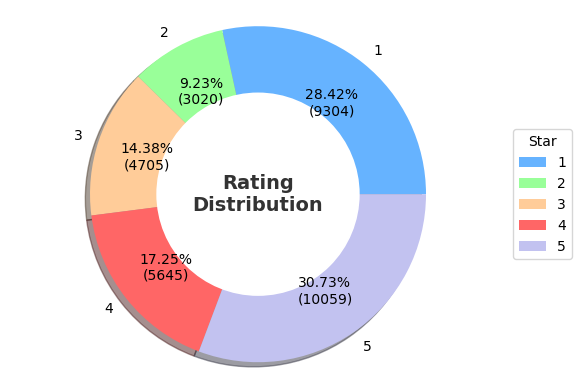

In [262]:
unique_star = df1['Star'].unique()

explode = [0] * len(unique_star)

sentiment_counts = df2.groupby("Star").size()

colors = ['#66b3ff', '#99ff99', '#ffcc99', '#ff6666', '#c2c2f0']  

fig, ax = plt.subplots()

wedges, texts, autotexts = ax.pie(
    x=sentiment_counts, 
    labels=sentiment_counts.index,
    autopct=lambda p: f'{p:.2f}%\n({int(p*sum(sentiment_counts)/100)})', 
    wedgeprops=dict(width=0.7),
    textprops=dict(size=10, color="black"),  
    pctdistance=0.7,
    colors=colors,
    explode=explode,  
    shadow=True
)
center_circle = plt.Circle((0, 0), 0.6, color='white', fc='white', linewidth=1.25)
fig.gca().add_artist(center_circle)

ax.text(0, 0, 'Rating\nDistribution', ha='center', va='center', fontsize=14, fontweight='bold', color='#333333')

ax.legend(sentiment_counts.index, title="Star", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax.axis('equal')  

plt.show()

###### Top 10 States by Frequency:

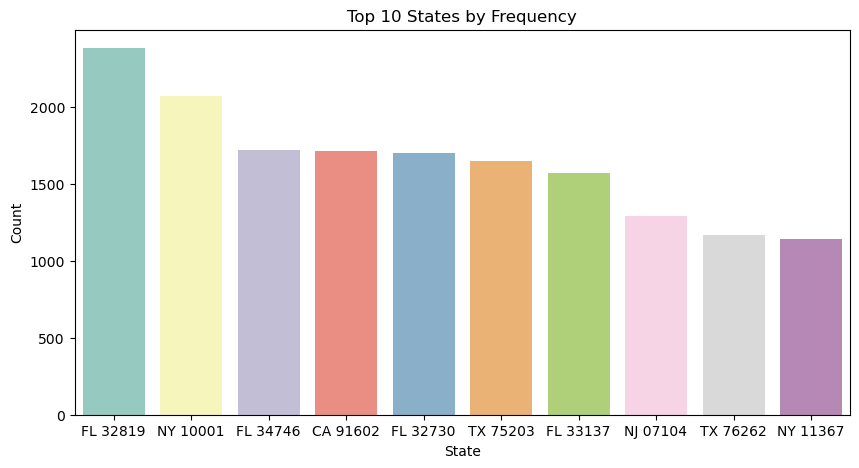

In [263]:
top_10_states = df2['State'].value_counts().nlargest(10)

plt.figure(figsize=(10, 5))
sns.set_palette("Set3")  
sns.countplot(x='State', data=df2, order=top_10_states.index)
plt.title('Top 10 States by Frequency')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

###### Top 10 City by Frequency:

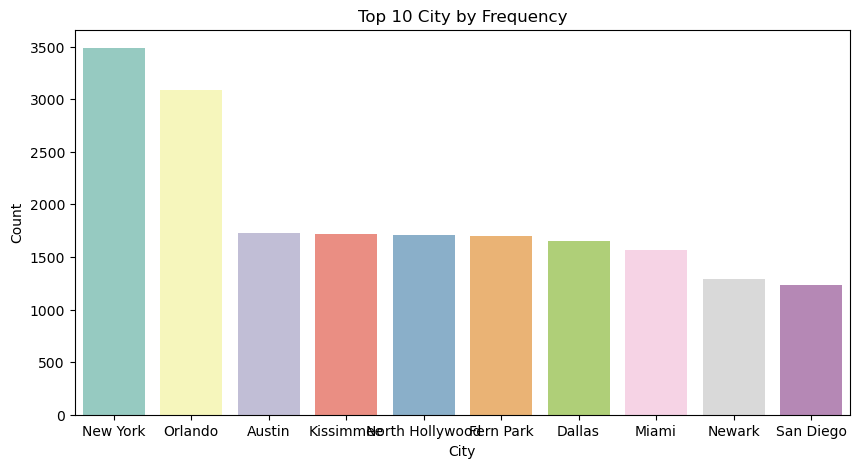

In [264]:
top_10_city = df2['City'].value_counts().nlargest(10)

plt.figure(figsize=(10, 5))
sns.set_palette("Set3")  
sns.countplot(x='City', data=df2, order=top_10_city.index)
plt.title('Top 10 City by Frequency')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

#### 2. Bivariate Analysis:

###### Distribution of Star Ratings by City:

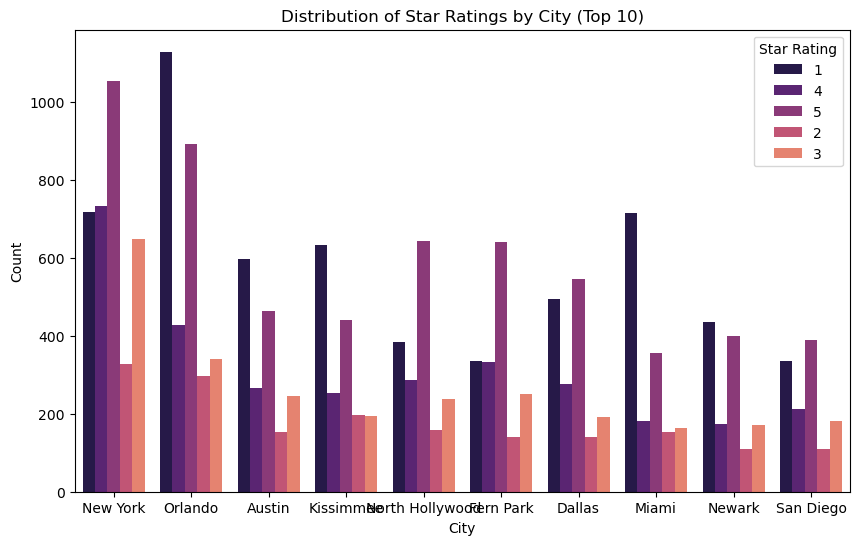

In [265]:
plt.figure(figsize=(10, 6))
sns.set_palette("magma") 
sns.countplot(x='City', hue='Star', data=df2, order=df2['City'].value_counts().iloc[:10].index)
plt.title('Distribution of Star Ratings by City (Top 10)')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Star Rating')
plt.show()

###### Distribution of Star Ratings by State:

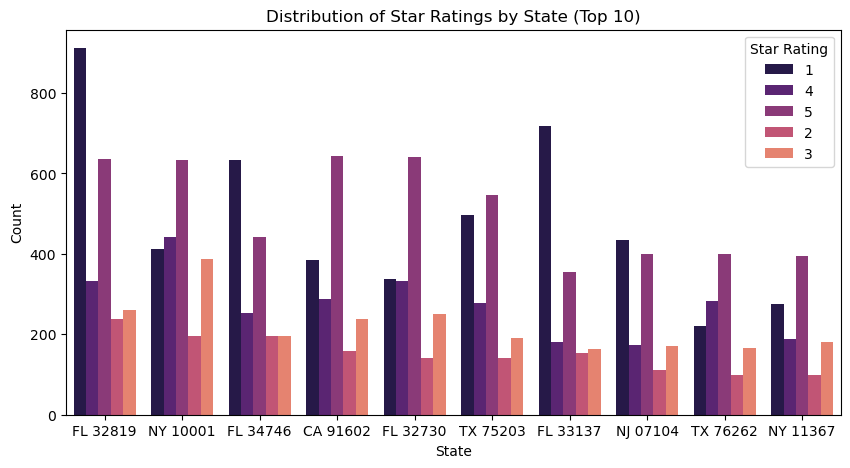

In [266]:
plt.figure(figsize=(10, 5))
sns.set_palette("magma") 
sns.countplot(x='State', hue='Star', data=df2, order=df2['State'].value_counts().iloc[:10].index)
plt.title('Distribution of Star Ratings by State (Top 10)')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Star Rating')
plt.show()

## 4. Data Preprocessing

In [267]:
df3 = df2.copy()

In [268]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32736 entries, 0 to 33395
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   review_time    32736 non-null  object
 1   review         32736 non-null  object
 2   City           32736 non-null  object
 3   State          32736 non-null  object
 4   Star           32736 non-null  object
 5   clean_reviews  32736 non-null  object
dtypes: object(6)
memory usage: 1.7+ MB


In [269]:
df3 = df3[["Star","clean_reviews"]]
df3.head(4)

,Star,clean_reviews
0,1,look like someone spit food normal transaction...
1,4,mcdonalds far food atmosphere go staff make di...
2,1,made mobile order got speaker checked line mov...
3,5,mc crispy chicken sandwich customer service qu...


In [270]:
analyzer = SentimentIntensityAnalyzer()

df3['sentiment_score'] = df3['clean_reviews'].apply(lambda text: analyzer.polarity_scores(text)['compound'])

df3['sentiment'] = df3['sentiment_score'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else'neutral'))

print(df3[['clean_reviews', 'sentiment_score', 'sentiment']].head())

                                       clean_reviews  sentiment_score  \
0  look like someone spit food normal transaction...           0.5541   
1  mcdonalds far food atmosphere go staff make di...           0.8591   
2  made mobile order got speaker checked line mov...          -0.2960   
3  mc crispy chicken sandwich customer service qu...           0.0000   
4  repeat order times drive thru still manage mes...          -0.7184   

  sentiment  
0  positive  
1  positive  
2  negative  
3   neutral  
4  negative  


#### 1. Sentiment Analysis

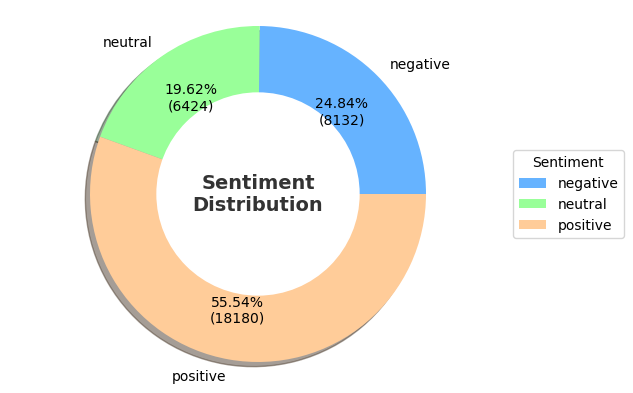

In [271]:
colors = ['#66b3ff', '#99ff99', '#ffcc99']

explode = (0.0, 0, 0)  

sentiment_counts = df3.groupby("sentiment").size()

fig, ax = plt.subplots()

wedges, texts, autotexts = ax.pie(
    x=sentiment_counts, 
    labels=sentiment_counts.index,
    autopct=lambda p: f'{p:.2f}%\n({int(p*sum(sentiment_counts)/100)})', 
    wedgeprops=dict(width=0.7),
    textprops=dict(size=10, color="black"),  
    pctdistance=0.7,
    colors=colors,
    explode=explode,
    shadow=True)

center_circle = plt.Circle((0, 0), 0.6, color='white', fc='white', linewidth=1.25)
fig.gca().add_artist(center_circle)

ax.text(0, 0, 'Sentiment\nDistribution', ha='center', va='center', fontsize=14, fontweight='bold', color='#333333')

ax.legend(sentiment_counts.index, title="Sentiment", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax.axis('equal')  

plt.show()

###### Common Words in Text Data:

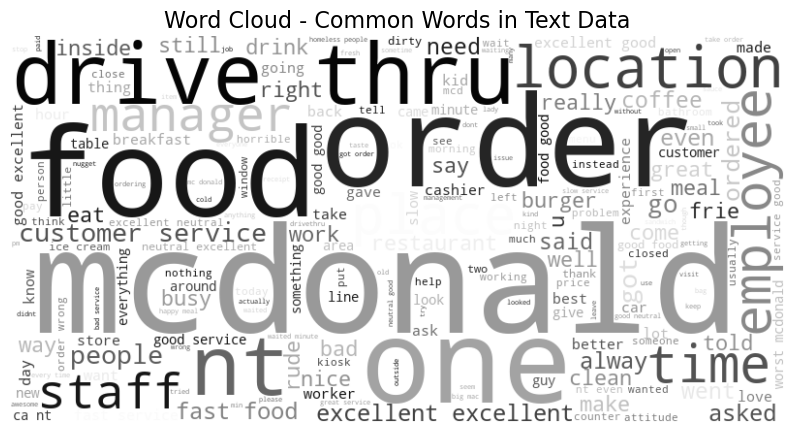

In [272]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine the words into a single string for WordCloud
text_data = ' '.join(df3['clean_reviews'].astype(str))

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='gray', contour_color='black').generate(text_data)

# Plot WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Common Words in Text Data', fontsize=16, color='black')
plt.show()


###### Words in Positive Sentiment:

In [278]:
df3['temp_list'] = df3['clean_reviews'].apply(lambda x: str(x).split())
top = Counter([item for sublist in df3[df3['sentiment'] == 'positive']['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(10), columns=['Common_words', 'count'])
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,good,5144
1,food,4545
2,service,3481
3,mcdonald,2648
4,order,2530
5,excellent,2520
6,nt,2415
7,great,2204
8,place,2078
9,clean,1834


###### Words in Netral Sentiment:

In [279]:
top = Counter([item for sublist in df3[df3['sentiment'] == 'neutral']['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(10), columns=['Common_words', 'count'])
temp_positive.style.background_gradient(cmap='Blues')

,Common_words,count
0,neutral,942
1,food,826
2,order,685
3,service,634
4,mcdonald,604
5,fast,545
6,drive,527
7,nt,456
8,get,403
9,slow,382


###### Words in Negative Sentiment:

In [280]:
top = Counter([item for sublist in df3[df3['sentiment'] == 'negative']['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(10), columns=['Common_words', 'count'])
temp_positive.style.background_gradient(cmap='Reds')

,Common_words,count
0,order,2840
1,food,2302
2,service,2003
3,nt,1782
4,get,1299
5,mcdonald,1251
6,drive,1105
7,worst,1081
8,bad,1071
9,rude,1062


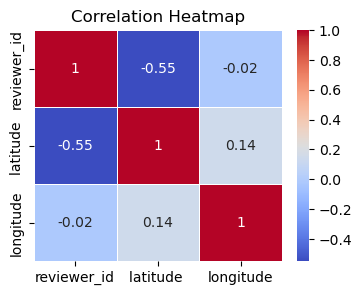

In [281]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Drop non-numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(4, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [285]:
df

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,look like someone spit food ? normal transacti...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,'d mcdonalds . far food atmosphere go . staff ...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,made mobile order got speaker checked . line m...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,mc . crispy chicken sandwich ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"repeat order times drive thru , still manage m...",1 star
...,...,...,...,...,...,...,...,...,...,...
33391,33392,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",4 years ago,treated badly .,1 star
33392,33393,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",a year ago,service good,5 stars
33393,33394,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",a year ago,remove hunger enough,4 stars
33394,33395,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",5 years ago,"'s good , lately become expensive .",5 stars


In [286]:
df3

,Star,clean_reviews,sentiment_score,sentiment,temp_list
0,1,look like someone spit food normal transaction...,0.5541,positive,"[look, like, someone, spit, food, normal, tran..."
1,4,mcdonalds far food atmosphere go staff make di...,0.8591,positive,"[mcdonalds, far, food, atmosphere, go, staff, ..."
2,1,made mobile order got speaker checked line mov...,-0.2960,negative,"[made, mobile, order, got, speaker, checked, l..."
3,5,mc crispy chicken sandwich customer service qu...,0.0000,neutral,"[mc, crispy, chicken, sandwich, customer, serv..."
4,1,repeat order times drive thru still manage mes...,-0.7184,negative,"[repeat, order, times, drive, thru, still, man..."
...,...,...,...,...,...
33391,1,treated badly,-0.4767,negative,"[treated, badly]"
33392,5,service good,0.4404,positive,"[service, good]"
33393,4,remove hunger enough,-0.2500,negative,"[remove, hunger, enough]"
33394,5,good lately become expensive,0.4404,positive,"[good, lately, become, expensive]"
